In [11]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [13]:
# File to Load 
city_data_to_load = "city_data - Copy.csv"

ride_data_to_load = "ride_data - Copy.csv"

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

#drop one duplicate record with same city name, same ride_ids but different # of drivers
city_df = city_df.drop_duplicates('city', keep = 'first')

#merge
merged_df = city_df.merge(ride_df, on = 'city')

merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


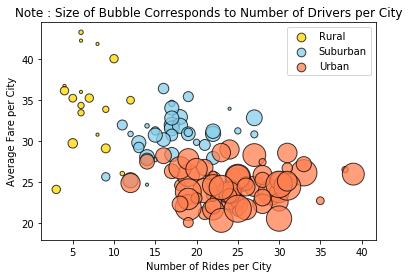

In [14]:
#group be city name
by_city = merged_df.groupby('city')

# var holding avg fare by city
avg_fare = by_city.mean()['fare']

#var holding rides by city
ride_count = by_city['ride_id'].count()

# num of drivers
driver_count = by_city.mean()['driver_count']

# city type data
city_type = city_df.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Number of Drivers', ascending = False)


#separated dfs for city categories
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, 
            label = 'Rural', alpha = .75, color = "gold", edgecolor = 'black')
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, 
            label = 'Suburban', alpha = .75, color = "skyblue", edgecolor = 'black')
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, 
            label = 'Urban', alpha = .75, color = "coral", edgecolor = 'black')

#print scatter plot
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')


#Create a legend
lgnd = plt.legend(frameon = True)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

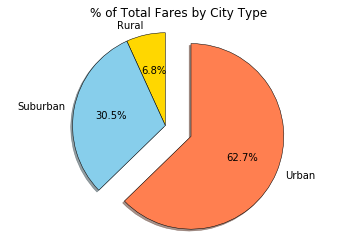

In [15]:
#group by type to be used by all pie charts
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']
colors = ["gold", "skyblue", "coral"]

#pie chart build
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, explode = explode, labels = labels, autopct = "%1.1f%%", 
        shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'}, colors = colors)

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

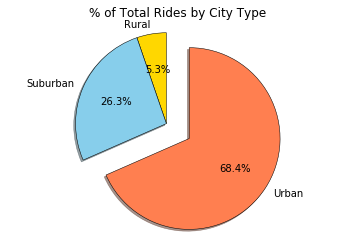

In [17]:
# number of ride per city type
 
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, labels = labels, autopct = "%1.1f%%", 
        shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'}, colors = colors)

plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

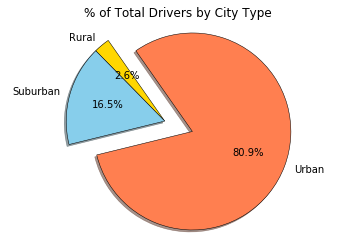

In [18]:
# of driver per city type

driver_sum = city_df.groupby('type').sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, labels = labels, autopct = "%1.1f%%", 
        shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'}, colors = colors)

plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()